<div class="image-container">
  <img class="image" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Logo-ITESO-Vertical-SinFondo-png.png" width="300" height="300" style="float: right">
</div>


<p>
    <font style = "font-family:Cambria">          
    <h2><font color="#191970" size = 6 >
        001 Microstructure
    </font></h2>         
    <br>         
    <font color='navy' size = 6>Proyecto 1</font>
    <br> 
    <h3><font size =4>Integrantes:</font></h3> 
    <ul>
        <li>Ricardo Rodriguez Salcedo</li>
        <li>Rodolfo Garcia Palma</li>
        <li>Sebastian Muñoz Baruqui</li>
        <li>Fernando Zepeda Fernandez</li>
        <li>Cesar Gerardo Escobar</li>
    </ul>               
    </font>
</p>


In [1]:
import jupyterthemes as jt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import tqdm
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.integrate import quad
import numpy as np
from scipy.optimize import minimize

* Plot the price distribution

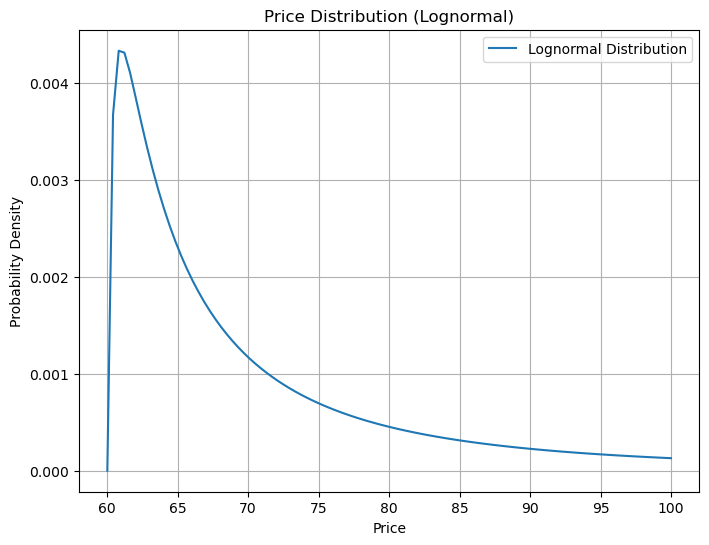

In [2]:
# Definir la función de densidad de probabilidad de la distribución lognormal
def lognormal_pdf(x, mu, sigma):
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x - mu)) ** 2) / (2 * sigma ** 2))

# Parámetros de la distribución lognormal
S = 60
mu = 60
sigma = 1.5

# Definir el rango de valores de precios centrados alrededor de 60
price_range = np.linspace(60.00001, 100, 100)  # Se inicia en 0.1 para evitar división por cero

# Calcular la función de densidad de probabilidad (PDF) para cada precio
pdf_values = lognormal_pdf(price_range, mu, sigma)

# Crear el gráfico de la distribución de precios
plt.figure(figsize=(8, 6))
plt.plot(price_range, pdf_values, label='Lognormal Distribution')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Price Distribution (Lognormal)')
plt.legend()
plt.grid(True)
plt.show()


Create a plot showing:

- Expected revenue if all trades are liquidity trades, and P_LB = PI_LS = 0.5 
- Expected revenue if there is a 40% chance that an informed trade will be executed, keep the same liquidity probabilities as the previous point.

![Screenshot 2024-02-05 at 6.33.36 p.m..png](<attachment:Screenshot 2024-02-05 at 6.33.36 p.m..png>)
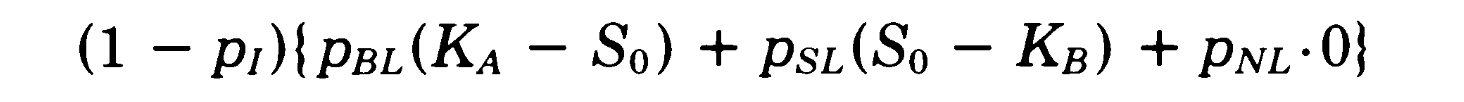

In [3]:
def expected_revenue_no_informed(S0, S, sigma, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución lognormal
    def lognormal_pdf(x, mu, sigma):
        return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma ** 2))
    
    # Calcular las integrales numéricamente
    integral1 = np.exp(-0.5 * ((np.log(Ka / S) / sigma) ** 2)) / (S * sigma * np.sqrt(2 * np.pi))
    integral2 = np.exp(-0.5 * ((np.log(Kb / S) / sigma) ** 2)) / (S * sigma * np.sqrt(2 * np.pi))
    
    # Calcular el valor esperado de revenue
    expected_revenue = (P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - (integral1 + integral2)
    
    return expected_revenue

def expected_revenue_with_informed(S0, S, sigma, P_I, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución lognormal
    def lognormal_pdf(x, mu, sigma):
        return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma ** 2))
    
    # Calcular las integrales numéricamente
    integral1 = np.exp(-0.5 * ((np.log(Ka / S) / sigma) ** 2)) / (S * sigma * np.sqrt(2 * np.pi))
    integral2 = np.exp(-0.5 * ((np.log(Kb / S) / sigma) ** 2)) / (S * sigma * np.sqrt(2 * np.pi))
    
    # Calcular el valor esperado de revenue
    expected_revenue = (1 - P_I) * (P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - P_I * (integral1 + integral2)
    
    return expected_revenue

# Parámetros dados
S0 = 65
S = 60
sigma = 1.5
P_I = 0.4
P_BL = 0.5
P_SL = 0.5

# Calcular el Expected Revenue para una serie de valores de ask spread
ask_spreads = np.linspace(0, 10, 100)
expected_revenues_no_informed = []
expected_revenues_with_informed = []

for ask_spread in ask_spreads:
    Ka = S0 + ask_spread
    Kb = S0 - ask_spread
    expected_revenues_no_informed.append(expected_revenue_no_informed(S0, S, sigma, P_BL, P_SL, Ka, Kb))
    expected_revenues_with_informed.append(expected_revenue_with_informed(S0, S, sigma, P_I, P_BL, P_SL, Ka, Kb))


### Expected revenue considering:
$\Pi_I$ = 0.4

$\Pi_LB(S)$ = 0.5 - 0.8S where $\Pi_LB$:[0,0.5]

$\Pi_LS(S)$ = 0.5 - 0.8S where $\Pi_LS$:[0,0.5]


![Screenshot 2024-02-05 at 9.53.06 p.m..png](<attachment:Screenshot 2024-02-05 at 9.53.06 p.m..png>)
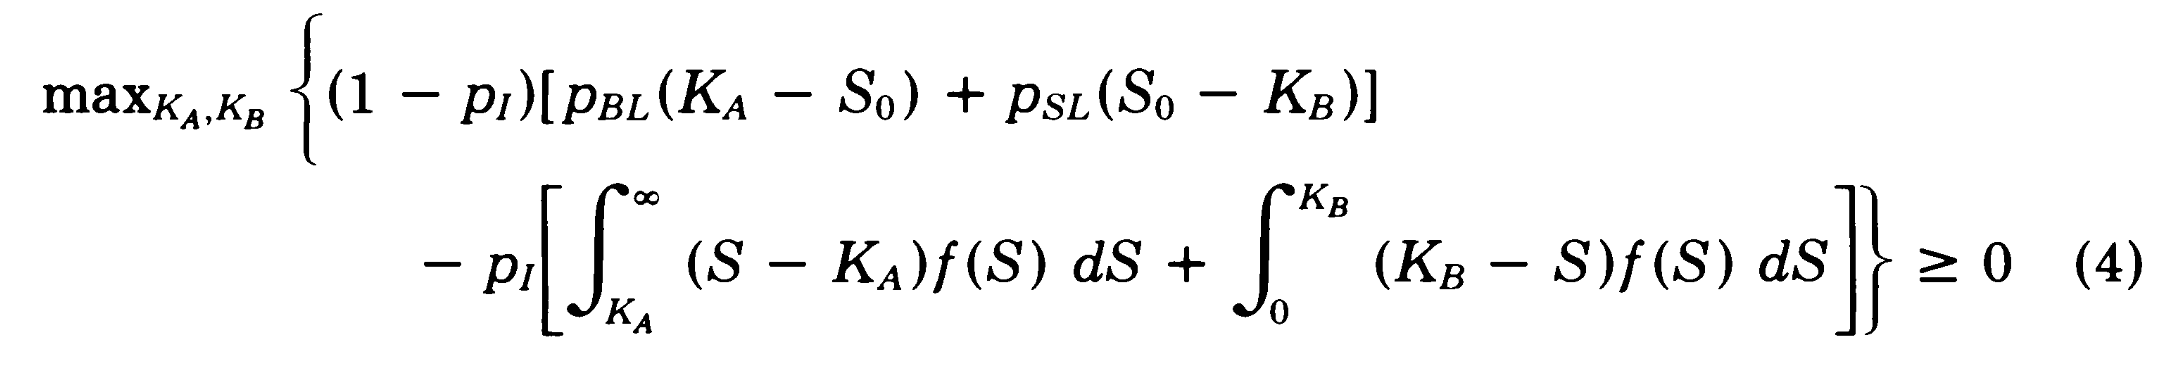

In [4]:
def expected_revenue(S0, S, sigma, P_I, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución lognormal
    def lognormal_pdf(x, mu, sigma):
        return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma ** 2))
    
    # Calcular las integrales numéricamente
    integral1, _ = quad(lambda x: (x - Ka) * lognormal_pdf(x, S, sigma), Ka, 100)
    integral2, _ = quad(lambda x: (Kb - x) * lognormal_pdf(x, S, sigma), 0, Kb)
    
    # Calcular el valor esperado de revenue
    expected_revenue = (1 - P_I) * (P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - P_I * (integral1 + integral2)
    
    return expected_revenue

# Parámetros dados
S0 = 65
sigma = 1.5
P_I = 0.4

# Calcular el Expected Revenue para una serie de valores de ask spread
ask_spreads = np.linspace(0, 10, 100)
expected_revenues = []

for ask_spread in ask_spreads:
    S = ask_spread

    Ka = S0 + S
    # Kb = S0 - S
    PL = (1 - P_I)
    P_BL = 0.5 - 0.08 * (ask_spread)
    P_SL = 0.5 - 0.08 * (S-Kb)
    
    # expected_revenues.append(expected_revenue(S0, S, sigma, P_I, P_BL, P_SL, Ka, Kb))
    expected_revenues.append(PL * P_BL * (ask_spread))

### Plot all together

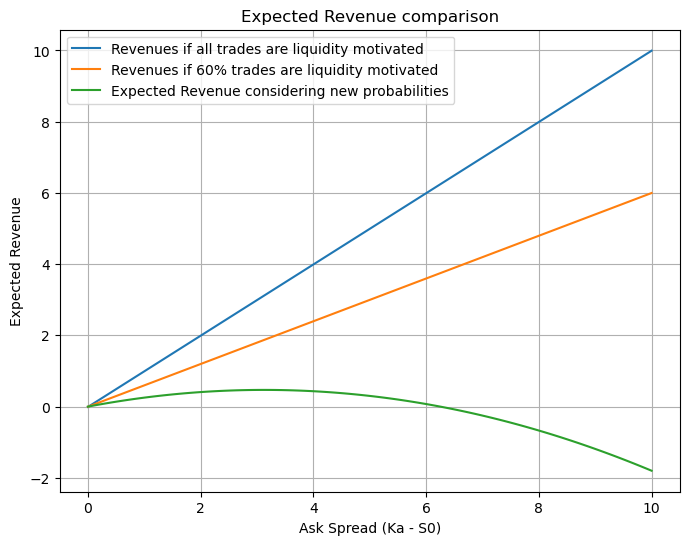

In [5]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(ask_spreads, expected_revenues_no_informed, label='Revenues if all trades are liquidity motivated')
plt.plot(ask_spreads, expected_revenues_with_informed, label='Revenues if 60% trades are liquidity motivated')
plt.plot(ask_spreads, expected_revenues, label='Expected Revenue considering new probabilities')
plt.xlabel('Ask Spread (Ka - S0)')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue comparison')
plt.legend()
plt.grid(True)
plt.show()


* Determine the optimal Bid / Ask price using Copeland & Galai's model with the defined parameters.

In [6]:

def expected_revenue(S0, S, sigma, P_BL, P_SL, Ka, Kb):
    # Definir la función de densidad de probabilidad de la distribución lognormal
    def lognormal_pdf(x, mu, sigma):
        return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x - mu)) ** 2) / (2 * sigma ** 2))
    
    # Calcular las integrales numéricamente
    integral1, _ = quad(lambda x: (x - Ka) * lognormal_pdf(x, S, sigma), Ka, 100)
    integral2, _ = quad(lambda x: (Kb - x) * lognormal_pdf(x, S, sigma), 60.001, Kb)

    P_BL = 0.5 - 0.08 * (Ka - S0)
    P_SL = 0.5 - 0.08 * (S0 - Kb)
    
    # Calcular el valor esperado de revenue
    expected_revenue = (1 - P_I)*(P_BL * (Ka - S0) + P_SL * (S0 - Kb)) - (P_I)*(integral1 + integral2)
    
    return -expected_revenue  # Negative because we want to minimize

# Parámetros dados
S0 = 65
S = 60
sigma = 1.5
P_BL = 0.5
P_SL = 0.5

# Función de optimización
def optimize_bid_ask():
    # Función objetivo para minimizar
    def objective(x):
        Ka, Kb = x
        return expected_revenue(S0, S, sigma, P_BL, P_SL, Ka, Kb)
    
    # Condiciones iniciales para la optimización
    initial_guess = [S0+3, S0-3]
    
    # Límites para los precios de oferta y demanda (bid y ask)
    bounds = [(S0, 100), (S+0.001, S0)]  # Adjusted bounds
    
    # Realizar la optimización
    result = minimize(objective, initial_guess, bounds=bounds)
    # print(result)
    if result.success:
        return result.x
    else:
        print("Optimization failed. Using default bid and ask prices.")
        return initial_guess  # Use default bid and ask prices

# Encontrar los precios óptimos de oferta y demanda (bid y ask)
optimal_bid, optimal_ask = optimize_bid_ask()
print("Optimal Bid Price:", optimal_bid)
print("Optimal Ask Price:", optimal_ask)



Optimal Bid Price: 68.18594097899978
Optimal Ask Price: 61.84603535613241


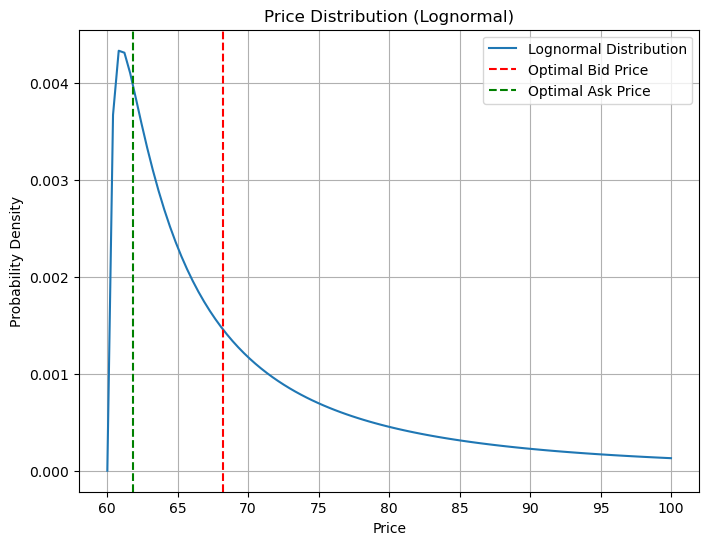

In [7]:
# Crear el gráfico de la distribución de precios
plt.figure(figsize=(8, 6))
plt.plot(price_range, pdf_values, label='Lognormal Distribution')
plt.axvline(optimal_bid, color='r', linestyle='--', label='Optimal Bid Price')
plt.axvline(optimal_ask, color='g', linestyle='--', label='Optimal Ask Price')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Price Distribution (Lognormal)')
plt.legend()
plt.grid(True)
plt.show()